In [1]:
'''This scrip allows me to compute the period, mass and semi-major axis distributions
for exoplanets following independent power laws. The alpha and beta were obtained 
using the values reported by Cumming et al, 2008. The semi-major axis is computed 
using Kepler's third law.'''

#Standard python packages

import matplotlib.pyplot as plt
import numpy as np
import random
from astropy import constants as c
import IMF_Generator

# import matplotlib as mpl
# mpl.rc('image', interpolation='nearest', origin='lower')
%matplotlib inline  

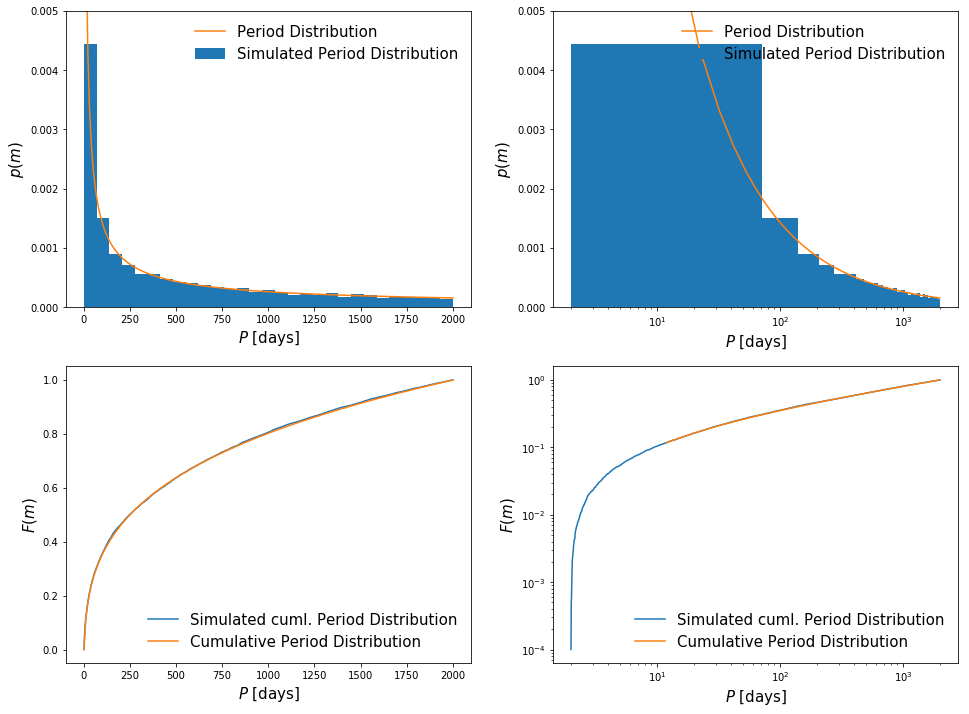

In [2]:
#Period distribution

Beta     = -0.26 + 1.0 #To be consistent with our script it must be negative
slopes   = [Beta]
masslims = [2, 2000]
myimf = IMF_Generator.MultiPartPowerLaw(np.array(slopes), np.array(masslims))
m     = np.linspace(masslims[0],masslims[-1],200)
lnpdf = myimf.pdf(m)
cdf   = myimf.cdf(m)
N     = 10000
ranperiod = myimf.rvs(N)

fig, ((axA, axB), (axC, axD)) = plt.subplots(figsize=(16,12), nrows=2, ncols=2)

axA.hist(ranperiod, bins = 'auto', normed = True, label = 'Simulated Period Distribution')
axA.plot(m, np.exp(lnpdf), label = 'Period Distribution')
axA.set_xlabel('$P$ [days]', size = 15)
axA.set_ylabel('$p(m)$', size = 15)
axA.set_ylim(0, 0.005)
axA.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3)

axB.hist(ranperiod, bins = 'auto', normed = True, label = 'Simulated Period Distribution')
axB.plot(m, np.exp(lnpdf), label = 'Period Distribution')
axB.set_xlabel('$P$ [days]', size = 15)
axB.set_ylabel('$p(m)$', size = 15)
# axB.set_yscale('log')
axB.set_xscale('log')
axB.set_ylim(0, 0.005)
axB.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3)

c = np.linspace(1.0/N,1,N)
axC.plot(np.sort(ranperiod), c, label = 'Simulated cuml. Period Distribution')
axC.plot(m, cdf, label = 'Cumulative Period Distribution')
axC.set_xlabel('$P$ [days]', size = 15)
axC.set_ylabel('$F(m)$', size = 15)
axC.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3)

axD.plot(np.sort(ranperiod), c, label='Simulated cuml. Period Distribution')
axD.plot(m, cdf, label='Cumulative Period Distribution')
axD.set_xlabel('$P$ [days]', size = 15)
axD.set_ylabel('$F(m)$', size = 15)
axD.set_yscale('log')
axD.set_xscale('log')
axD.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3)

plt.savefig("Period_distribution_Cumming.png")

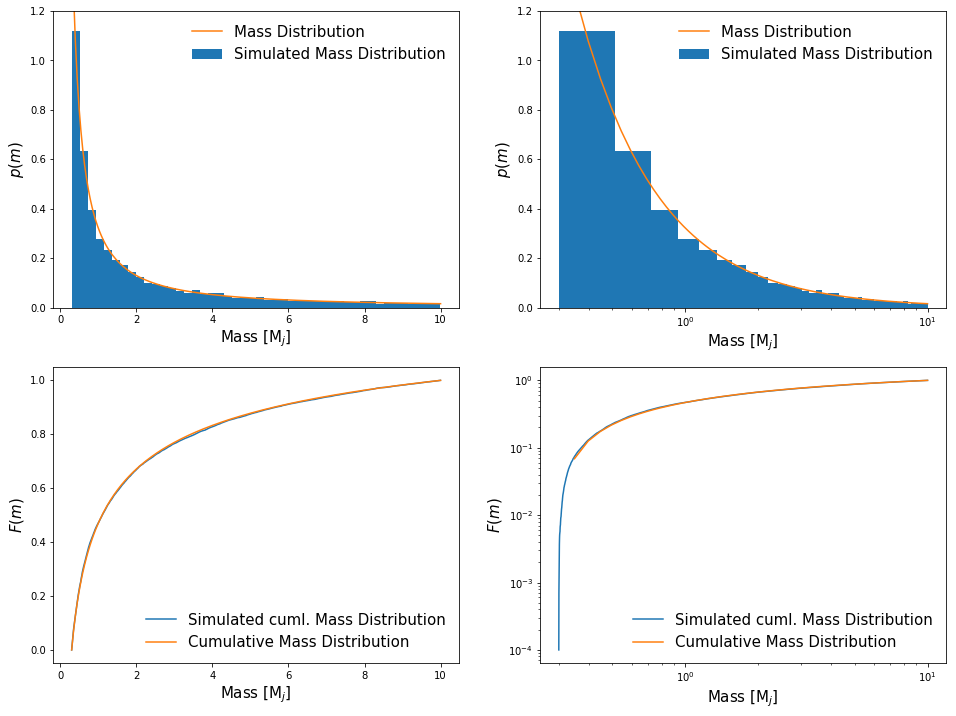

In [3]:
#Mass distribution

Alpha     = 0.31 + 1.0 #Following Eric Nielsen it should be -1.16 (Here following Cumming is -1.31)
slopes   = [Alpha]
masslims = [0.3, 10.0]
myimf = IMF_Generator.MultiPartPowerLaw(np.array(slopes), np.array(masslims))
m     = np.linspace(masslims[0],masslims[-1],200)
lnpdf = myimf.pdf(m)
cdf   = myimf.cdf(m)
N     = 10000
ranmasses = myimf.rvs(N)

fig, ((axA, axB), (axC, axD)) = plt.subplots(figsize=(16,12), nrows=2, ncols=2)
axA.hist(ranmasses, bins='auto', normed=True, label='Simulated Mass Distribution')
axA.plot(m, np.exp(lnpdf), label='Mass Distribution')
axA.set_xlabel('Mass [M$_j$]', size = 15)
axA.set_ylabel('$p(m)$', size = 15)
axA.set_ylim(0, 1.2)
axA.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3)

axB.hist(ranmasses, bins='auto', normed=True, label='Simulated Mass Distribution')
axB.plot(m, np.exp(lnpdf), label='Mass Distribution')
axB.set_xlabel('Mass [M$_j$]', size = 15)
axB.set_ylabel('$p(m)$', size = 15)
# axB.set_yscale('log')
axB.set_xscale('log')
axB.set_ylim(0, 1.2)
axB.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3)

c = np.linspace(1.0/N,1,N)
axC.plot(np.sort(ranmasses), c, label='Simulated cuml. Mass Distribution')
axC.plot(m, cdf, label='Cumulative Mass Distribution')
axC.set_xlabel('Mass [M$_j$]', size = 15)
axC.set_ylabel('$F(m)$', size = 15)
axC.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3)

axD.plot(np.sort(ranmasses), c, label='Simulated cuml. Mass Distribution')
axD.plot(m, cdf, label='Cumulative Mass Distribution')
axD.set_xlabel('Mass [M$_j$]', size = 15)
axD.set_ylabel('$F(m)$', size = 15)
axD.set_yscale('log')
axD.set_xscale('log')
axD.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3)

plt.savefig("Mass_distribution_Cumming.png")

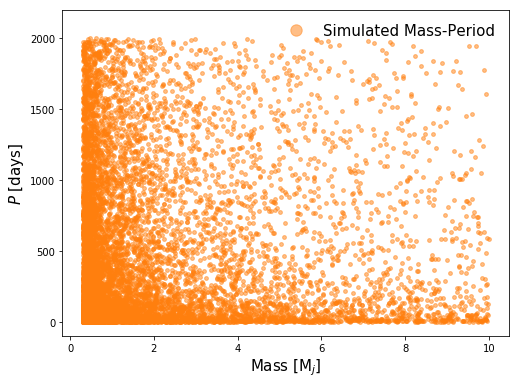

In [4]:
plt.figure(figsize = (8,6))
# plt.scatter(ranmasses, ranperiod, label='Simulated Mass-Period', s = 8)
plt.plot(ranmasses, ranperiod, 'o', c = 'C1', markersize = 3.8, alpha = 0.5, label='Simulated Mass-Period')
plt.ylabel('$P$ [days]', size = 15)
plt.xlabel('Mass [M$_j$]', size = 15)
#plt.xscale('log')
#plt.yscale('log')
plt.ylim(-100, 2200)
#plt.xlim(2,100)
plt.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3)
plt.savefig("Period_mass_distribution_Cumming.png")

Period = np.array([ranperiod])
Mass   = np.array([ranmasses])

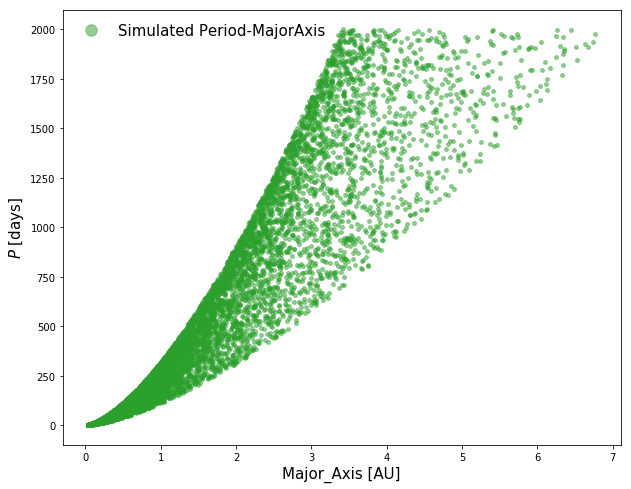

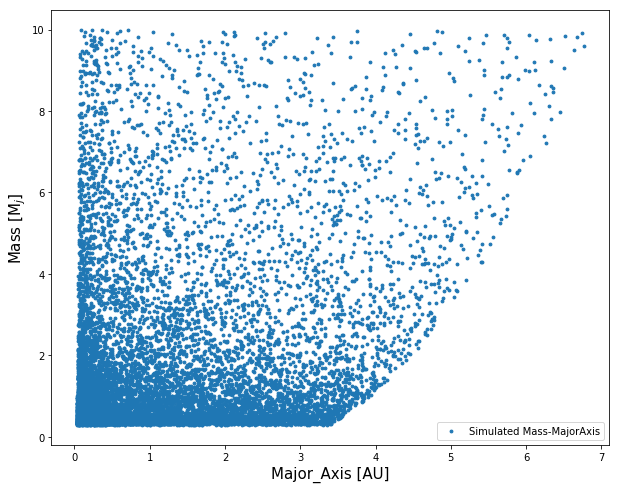

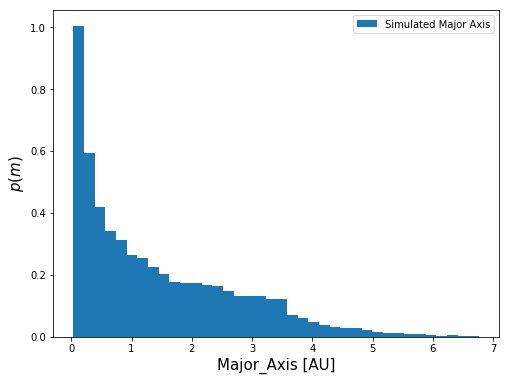

In [27]:
G = 2.959e-4 # AU^3 / Msun day^2

def MajorAxis(M, m, P):
    return (G * (M + m) / (4.0*np.pi**2))**(1.0/3.0) * P**(2.0/3.0)

Major_axis = []
for i in range(len(ranmasses)):
    Major_axis.append(MajorAxis(1.0, ranmasses[i], ranperiod[i]))
    
#print(Major_axis[1])   
#print(MajorAxis(1.0, ranmasses[1], ranperiod[1]))

plt.figure(figsize = (10,8))
# plt.scatter(Major_axis, ranperiod, label='Simulated Period-MajorAxis', s = 8)
plt.plot(Major_axis, ranperiod,'o', c = 'C2', markersize = 3.8, alpha = 0.5, label='Simulated Period-MajorAxis')
plt.ylabel('$P$ [days]', size = 15)
plt.xlabel('Major_Axis [AU]', size = 15)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.3,10)
#plt.xlim(0,10)
plt.legend(frameon = False, loc = 'best', prop = {'size': 15}, markerscale = 3)
plt.savefig("Period_major_distribution_Cumming.png")

plt.figure(figsize = (10,8))
plt.scatter(Major_axis, ranmasses, label='Simulated Mass-MajorAxis', s = 8)
plt.ylabel('Mass [M$_j$]', size = 15)
plt.xlabel('Major_Axis [AU]', size = 15)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0.3,10)
#plt.xlim(0,10)
plt.legend()
plt.savefig("Mass_major_distribution_Cumming.png")

plt.figure(figsize = (8,6))
plt.hist(Major_axis, bins = 'auto', normed = True, label = 'Simulated Major Axis')
plt.ylabel('$p(m)$', size = 15)
plt.xlabel('Major_Axis [AU]', size = 15)
plt.legend()

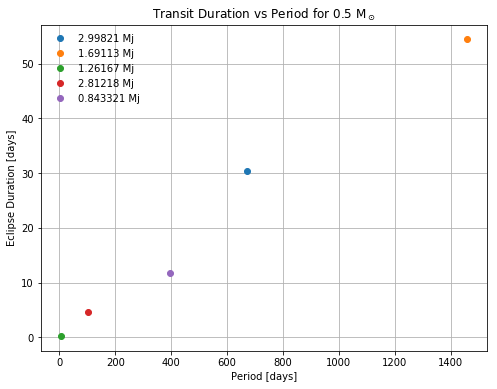

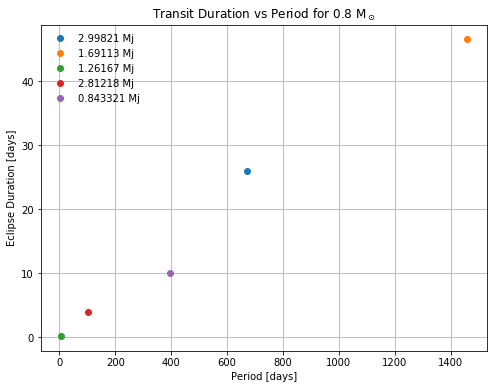

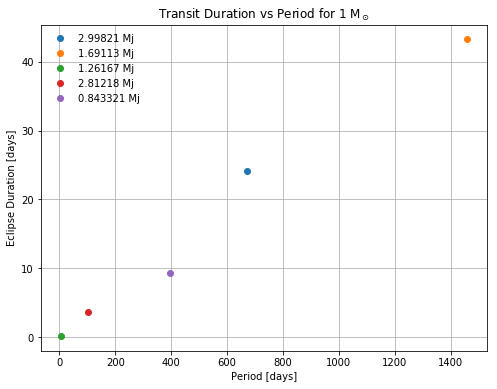

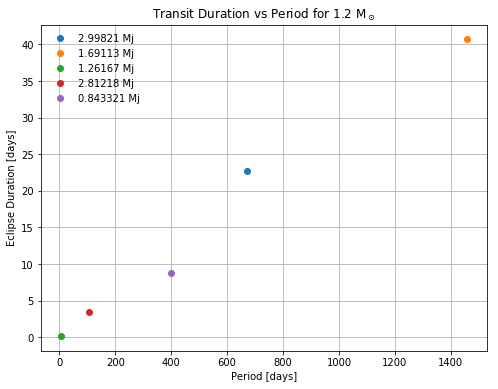

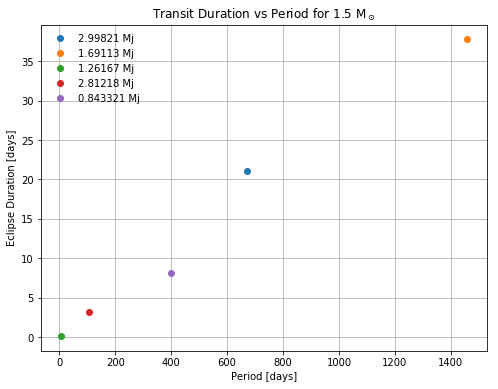

In [13]:
Planet_mass = np.array([ranmasses[0], ranmasses[1], ranmasses[2], ranmasses[3], ranmasses[4]])
Period      = np.array([ranperiod[0], ranperiod[1], ranperiod[2], ranperiod[3], ranperiod[4]])
Mass_star   = np.array([0.5, 0.8, 1.0, 1.2, 1.5])
#print('Mass(M_jupiter) = %1.2f Period(days) = %4.2f'%(Planet_mass, Period))

def Eclipsing_Time(M, m, P, epsilon):
    return P * (epsilon / np.pi) * (m / (2.0*M))**(1.0/3.0)

Masses_CF = c.GM_jup/c.GM_sun              #From jupiter mass to solar mass

epsilon     = 0.3                       #Quillen & Trilling, 1998

for j in range(len(Mass_star)):
    plt.figure()
    plt.figure(figsize = (8,6))
    for i in range(len(Planet_mass)):
        plt.plot(Period[i], Eclipsing_Time(Mass_star[j], Planet_mass[i]*Masses_CF, Period[i], 1), 'o', label = r'%g Mj'%(Planet_mass[i]))
    plt.legend(frameon = False, loc = 'best')
    plt.title(r'Transit Duration vs Period for %g M$_\odot$'%(Mass_star[j]))
    plt.xlabel('Period [days]')
    plt.ylabel('Eclipse Duration [days]')
    plt.grid()
    plt.savefig("Eclipse_Period_%d_Cumming"%(j))
